# [CDAF] Atividade 2

## Nome e matrícula
Nome: Lucas Rafael Costa Santos
Matrícula: 2021017723

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2023 do FBRef.

## Questão 1
- Acesse os dados em https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

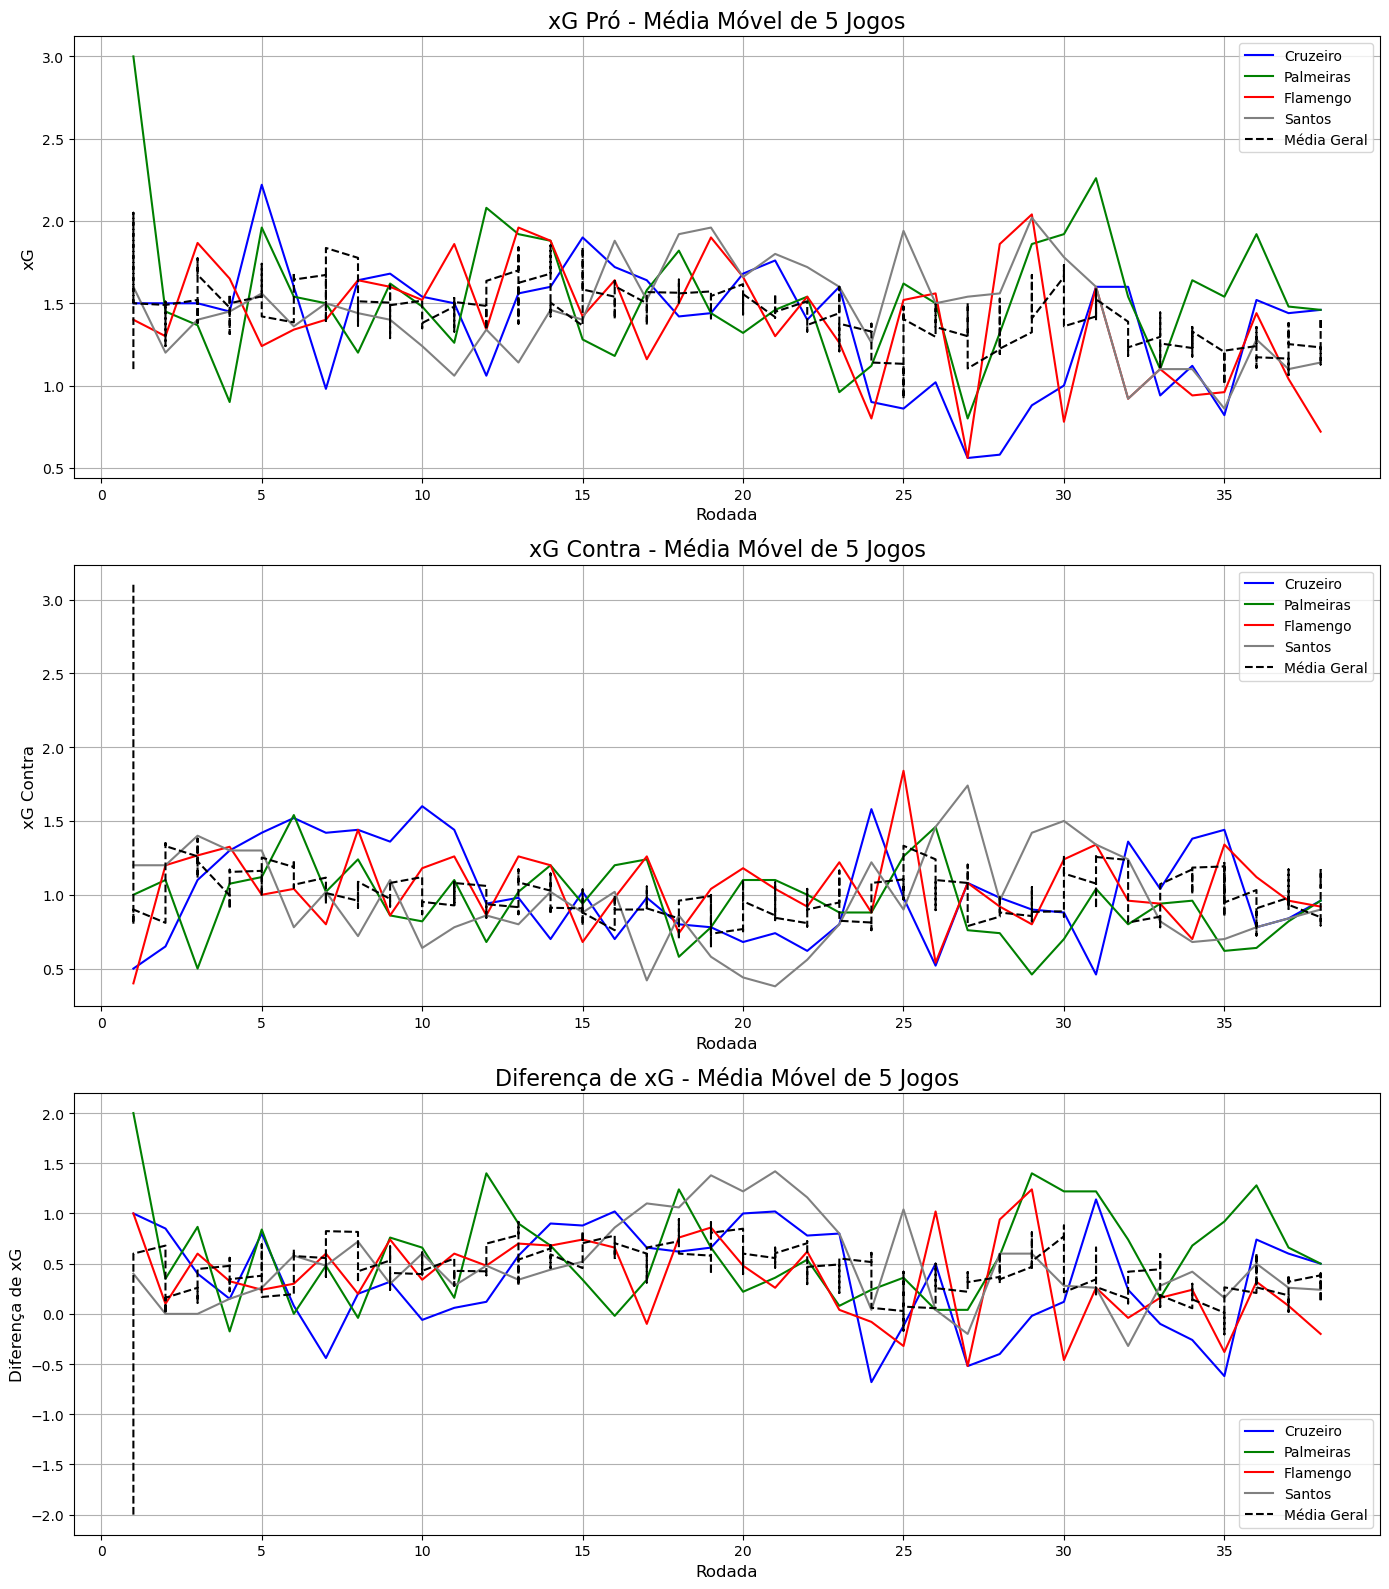

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV com a renomeação das colunas
df = pd.read_csv('camp_brasileiro_2023.csv', names=['Wk', 'Day', 'Date', 'Time', 'Home', 'xG_Home', 'Score', 'xG_Away', 'Away', 'Attendance', 'Venue', 'Referee', 'Match Report', 'Notes'], header=0)

# Ordenar os dados pela rodada
df = df.sort_values(by='Wk')

# Substituir valores NaN por 0 na coluna 'Attendance'
df['Attendance'] = df['Attendance'].fillna('0')

# Remover vírgulas e converter para int
df['Attendance'] = df['Attendance'].str.replace(',', '').astype(int)

# Converter as colunas 'xG_Home' e 'xG_Away' para float
df['xG_Home'] = df['xG_Home'].astype(float)
df['xG_Away'] = df['xG_Away'].astype(float)

# Calcular a diferença de xG
df['Dif_xG'] = df['xG_Home'] - df['xG_Away']

# Calcular a média móvel de 5 jogos para cada equipe e estatística
teams = df['Home'].unique()
for team in teams:
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    team_df = team_df.sort_values(by='Wk')
    team_df['xG_Home_MA'] = team_df['xG_Home'].rolling(window=5, min_periods=1).mean()
    team_df['xG_Away_MA'] = team_df['xG_Away'].rolling(window=5, min_periods=1).mean()
    team_df['Dif_xG_MA'] = team_df['Dif_xG'].rolling(window=5, min_periods=1).mean()
    df.loc[team_df.index, 'xG_Home_MA'] = team_df['xG_Home_MA']
    df.loc[team_df.index, 'xG_Away_MA'] = team_df['xG_Away_MA']
    df.loc[team_df.index, 'Dif_xG_MA'] = team_df['Dif_xG_MA']

# Escolher 4 times para visualização
times_escolhidos = ['Cruzeiro', 'Palmeiras', 'Flamengo', 'Santos']

cores = ['blue', 'green', 'red', 'gray']

# Plotar as séries temporais das estatísticas escolhidas
plt.figure(figsize=(14, 16))  # Ajuste do tamanho da figura

# xG pró
plt.subplot(3, 1, 1)
for i, team in enumerate(times_escolhidos):
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    plt.plot(team_df['Wk'], team_df['xG_Home_MA'], label=team, color=cores[i])
plt.plot(df['Wk'], df['xG_Home_MA'].rolling(window=5, min_periods=1).mean(), 'k--', label='Média Geral')
plt.title('xG Pró - Média Móvel de 5 Jogos', fontsize=16)  # Ajuste do tamanho do título
plt.xlabel('Rodada', fontsize=12)  # Ajuste do tamanho do rótulo do eixo x
plt.ylabel('xG', fontsize=12)  # Ajuste do tamanho do rótulo do eixo y
plt.legend(fontsize=10)  # Ajuste do tamanho da legenda
plt.grid(True)  # Adiciona grade ao gráfico
plt.xticks(fontsize=10)  # Ajuste do tamanho dos ticks no eixo x

# xG contra
plt.subplot(3, 1, 2)
for i, team in enumerate(times_escolhidos):
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    plt.plot(team_df['Wk'], team_df['xG_Away_MA'], label=team, color=cores[i])
plt.plot(df['Wk'], df['xG_Away_MA'].rolling(window=5, min_periods=1).mean(), 'k--', label='Média Geral')
plt.title('xG Contra - Média Móvel de 5 Jogos', fontsize=16)  # Ajuste do tamanho do título
plt.xlabel('Rodada', fontsize=12)  # Ajuste do tamanho do rótulo do eixo x
plt.ylabel('xG Contra', fontsize=12)  # Ajuste do tamanho do rótulo do eixo y
plt.legend(fontsize=10)  # Ajuste do tamanho da legenda
plt.grid(True)  # Adiciona grade ao gráfico
plt.xticks(fontsize=10)  # Ajuste do tamanho dos ticks no eixo x

# Diferença de xG
plt.subplot(3, 1, 3)
for i, team in enumerate(times_escolhidos):
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    plt.plot(team_df['Wk'], team_df['Dif_xG_MA'], label=team, color=cores[i])
plt.plot(df['Wk'], df['Dif_xG_MA'].rolling(window=5, min_periods=1).mean(), 'k--', label='Média Geral')
plt.title('Diferença de xG - Média Móvel de 5 Jogos', fontsize=16)  # Ajuste do tamanho do título
plt.xlabel('Rodada', fontsize=12)  # Ajuste do tamanho do rótulo do eixo x
plt.ylabel('Diferença de xG', fontsize=12)  # Ajuste do tamanho do rótulo do eixo y
plt.legend(fontsize=10)  # Ajuste do tamanho da legenda
plt.grid(True)  # Adiciona grade ao gráfico
plt.xticks(fontsize=10)  # Ajuste do tamanho dos ticks no eixo x

plt.tight_layout()  # Ajuste do espaçamento entre os subplots
plt.show()

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

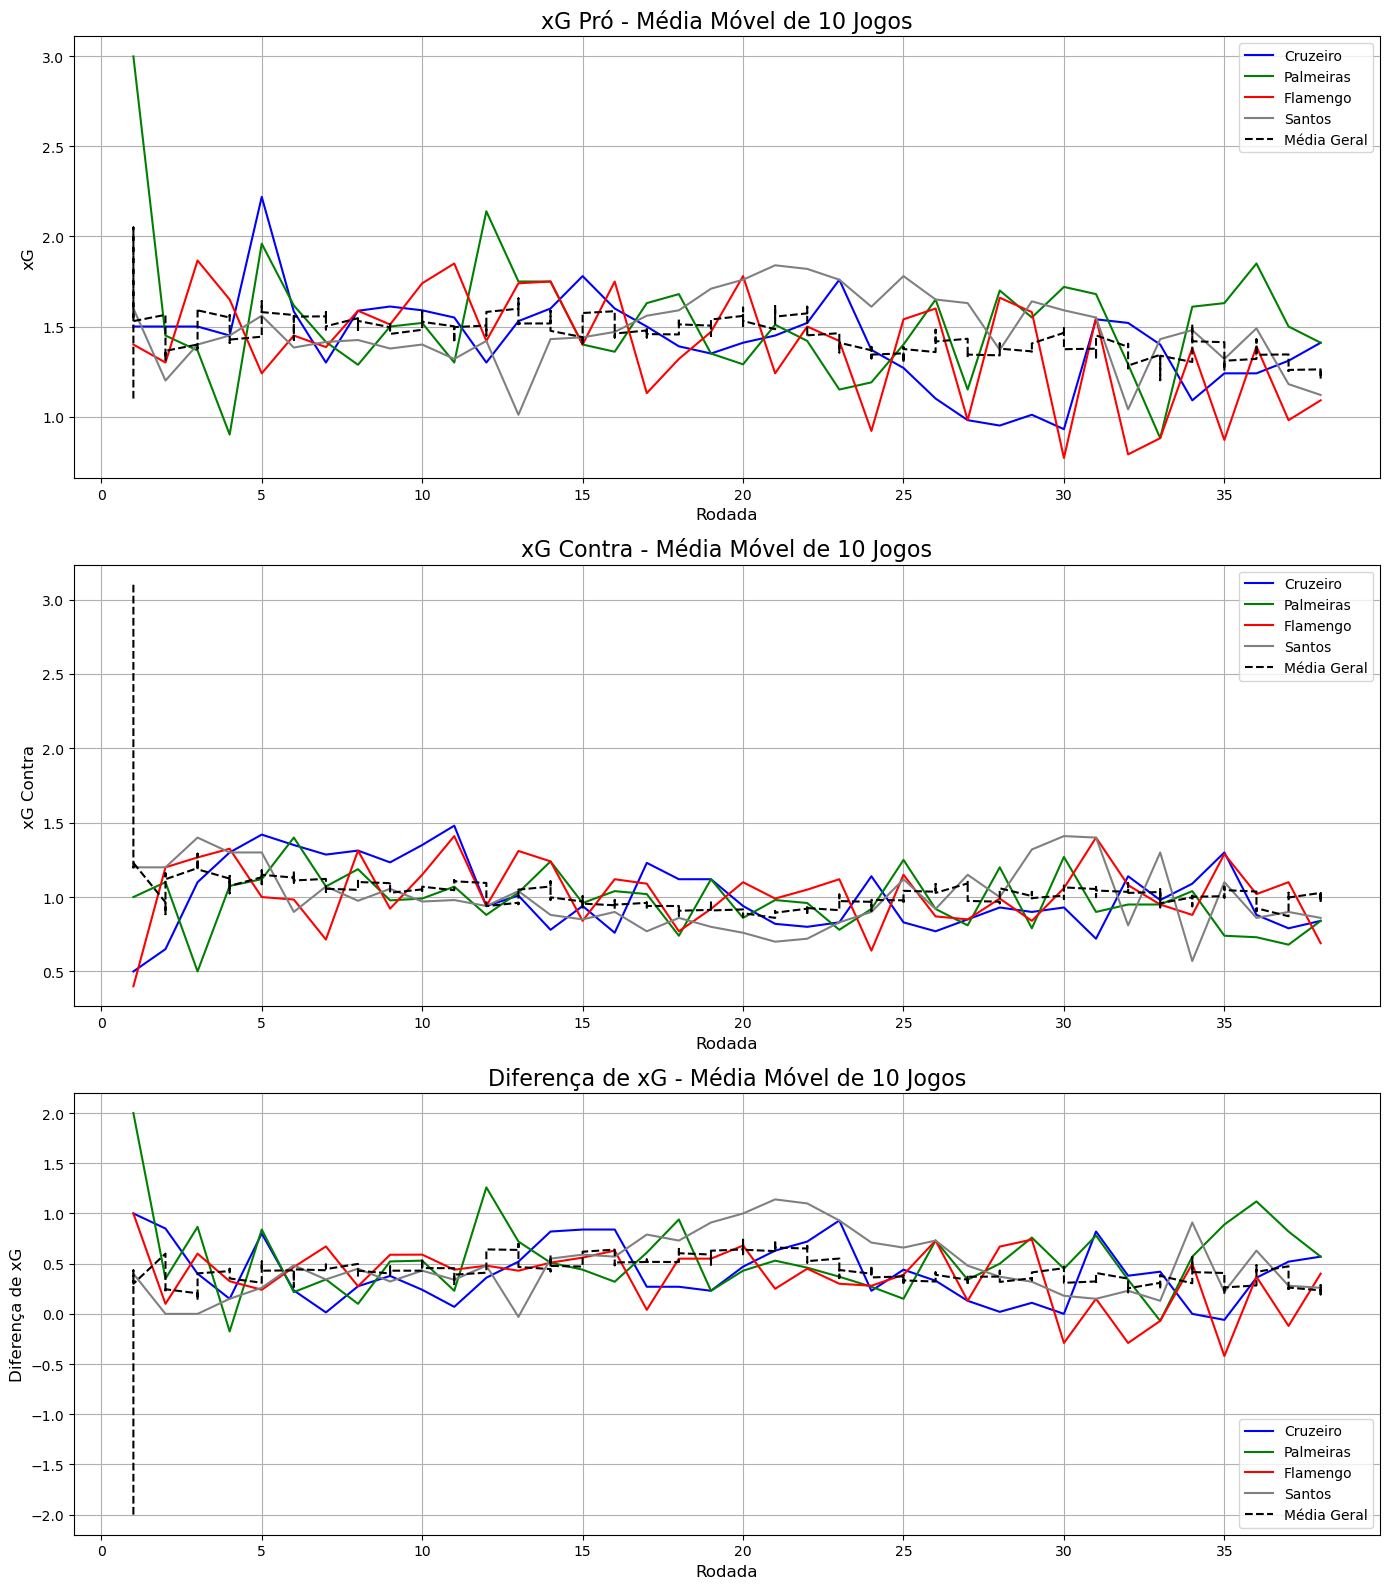

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV com a renomeação das colunas
df = pd.read_csv('camp_brasileiro_2023.csv', names=['Wk', 'Day', 'Date', 'Time', 'Home', 'xG_Home', 'Score', 'xG_Away', 'Away', 'Attendance', 'Venue', 'Referee', 'Match Report', 'Notes'], header=0)

# Ordenar os dados pela rodada
df = df.sort_values(by='Wk')

# Substituir valores NaN por 0 na coluna 'Attendance'
df['Attendance'] = df['Attendance'].fillna('0')

# Remover vírgulas e converter para int
df['Attendance'] = df['Attendance'].str.replace(',', '').astype(int)

# Converter as colunas 'xG_Home' e 'xG_Away' para float
df['xG_Home'] = df['xG_Home'].astype(float)
df['xG_Away'] = df['xG_Away'].astype(float)

# Calcular a diferença de xG
df['Dif_xG'] = df['xG_Home'] - df['xG_Away']

# Calcular a média móvel de 10 jogos para cada equipe e estatística
teams = df['Home'].unique()
for team in teams:
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    team_df = team_df.sort_values(by='Wk')
    team_df['xG_Home_MA'] = team_df['xG_Home'].rolling(window=10, min_periods=1).mean()
    team_df['xG_Away_MA'] = team_df['xG_Away'].rolling(window=10, min_periods=1).mean()
    team_df['Dif_xG_MA'] = team_df['Dif_xG'].rolling(window=10, min_periods=1).mean()
    df.loc[team_df.index, 'xG_Home_MA'] = team_df['xG_Home_MA']
    df.loc[team_df.index, 'xG_Away_MA'] = team_df['xG_Away_MA']
    df.loc[team_df.index, 'Dif_xG_MA'] = team_df['Dif_xG_MA']

# Escolher 4 times para visualização
times_escolhidos = ['Cruzeiro', 'Palmeiras', 'Flamengo', 'Santos']

# Definir cores para cada time
cores = ['blue', 'green', 'red', 'gray']

# Plotar as séries temporais das estatísticas escolhidas
plt.figure(figsize=(14, 16))  # Ajuste do tamanho da figura

# xG pró
plt.subplot(3, 1, 1)
for i, team in enumerate(times_escolhidos):
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    plt.plot(team_df['Wk'], team_df['xG_Home_MA'], label=team, color=cores[i])
plt.plot(df['Wk'], df['xG_Home_MA'].rolling(window=10, min_periods=1).mean(), 'k--', label='Média Geral')
plt.title('xG Pró - Média Móvel de 10 Jogos', fontsize=16)  # Ajuste do tamanho do título
plt.xlabel('Rodada', fontsize=12)  # Ajuste do tamanho do rótulo do eixo x
plt.ylabel('xG', fontsize=12)  # Ajuste do tamanho do rótulo do eixo y
plt.legend(fontsize=10)  # Ajuste do tamanho da legenda
plt.grid(True)  # Adiciona grade ao gráfico
plt.xticks(fontsize=10)  # Ajuste do tamanho dos ticks no eixo x

# xG contra
plt.subplot(3, 1, 2)
for i, team in enumerate(times_escolhidos):
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    plt.plot(team_df['Wk'], team_df['xG_Away_MA'], label=team, color=cores[i])
plt.plot(df['Wk'], df['xG_Away_MA'].rolling(window=10, min_periods=1).mean(), 'k--', label='Média Geral')
plt.title('xG Contra - Média Móvel de 10 Jogos', fontsize=16)  # Ajuste do tamanho do título
plt.xlabel('Rodada', fontsize=12)  # Ajuste do tamanho do rótulo do eixo x
plt.ylabel('xG Contra', fontsize=12)  # Ajuste do tamanho do rótulo do eixo y
plt.legend(fontsize=10)  # Ajuste do tamanho da legenda
plt.grid(True)  # Adiciona grade ao gráfico
plt.xticks(fontsize=10)  # Ajuste do tamanho dos ticks no eixo x

# Diferença de xG
plt.subplot(3, 1, 3)
for i, team in enumerate(times_escolhidos):
    team_df = df[(df['Home'] == team) | (df['Away'] == team)]
    plt.plot(team_df['Wk'], team_df['Dif_xG_MA'], label=team, color=cores[i])
plt.plot(df['Wk'], df['Dif_xG_MA'].rolling(window=10, min_periods=1).mean(), 'k--', label='Média Geral')
plt.title('Diferença de xG - Média Móvel de 10 Jogos', fontsize=16)  # Ajuste do tamanho do título
plt.xlabel('Rodada', fontsize=12)  # Ajuste do tamanho do rótulo do eixo x
plt.ylabel('Diferença de xG', fontsize=12)  # Ajuste do tamanho do rótulo do eixo y
plt.legend(fontsize=10)  # Ajuste do tamanho da legenda
plt.grid(True)  # Adiciona grade ao gráfico
plt.xticks(fontsize=10)  # Ajuste do tamanho dos ticks no eixo x

plt.tight_layout()  # Ajuste do espaçamento entre os subplots
plt.show()

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

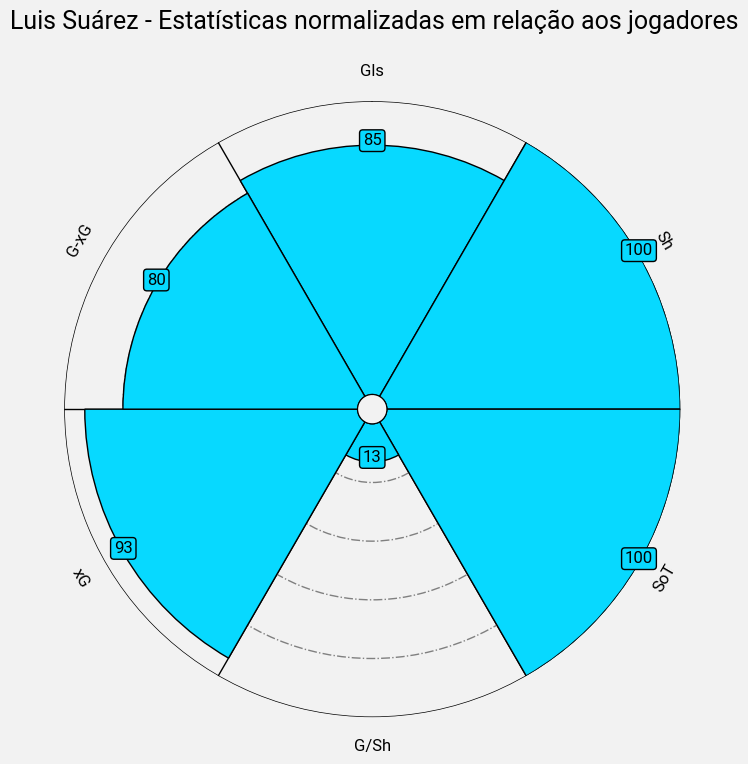

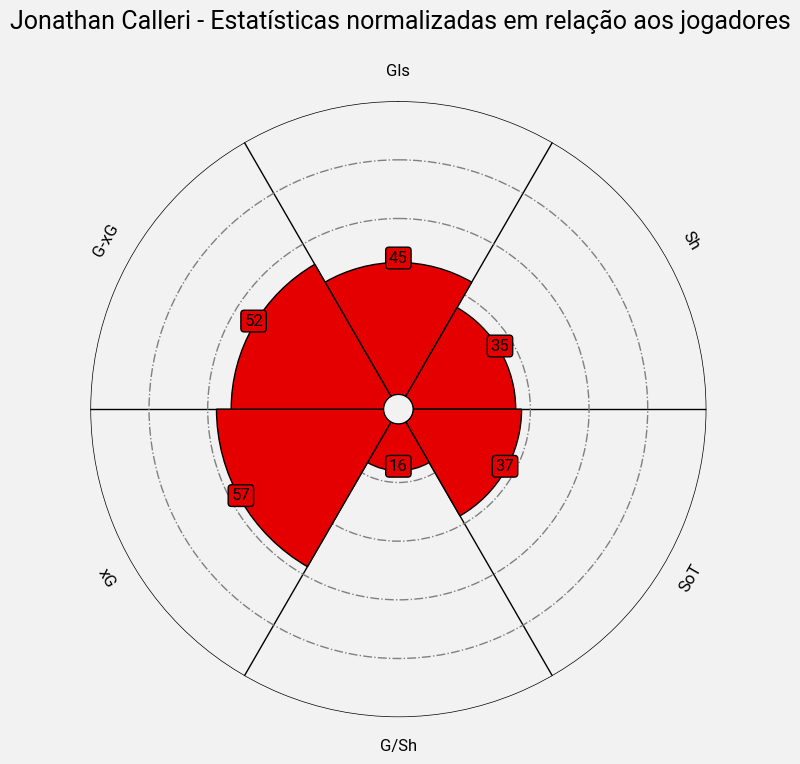

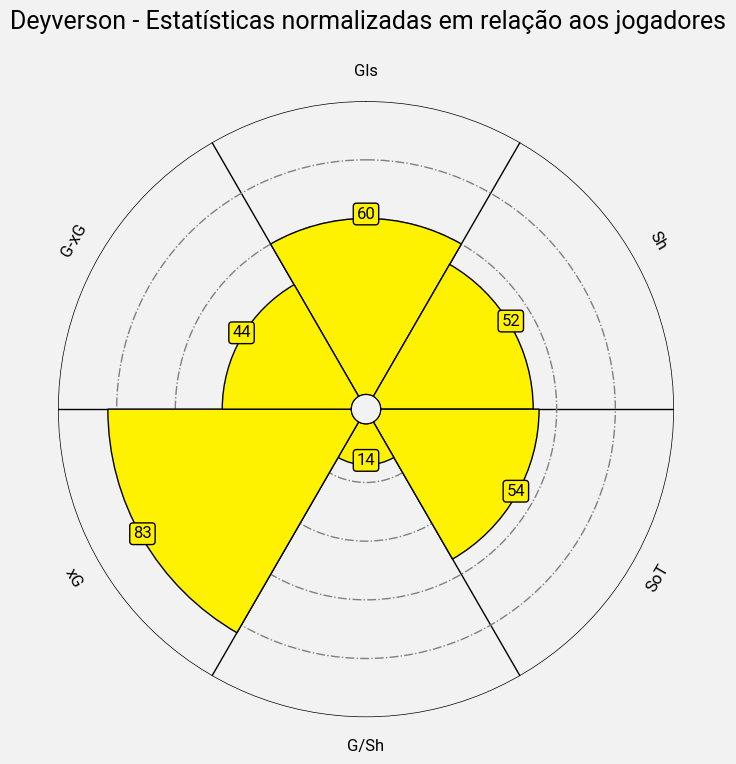

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager
from scipy import stats

# Carregar os dados dos atacantes
df = pd.read_csv('atacantes_2023.csv', delimiter=';')

# Mapear os nomes dos jogadores para os times
jogadores_times = {
    'Luis Suárez': 'Grêmio',
    'Jonathan Calleri': 'São Paulo',
    'Deyverson': 'Cuiabá'
}

# Selecionar os atributos de interesse
atributos = ['Gls', 'Sh', 'SoT', 'G/Sh', 'xG', 'G-xG']

# Calcular os valores mínimos e máximos de cada atributo
min_vals = df[atributos].min()
max_vals = df[atributos].max()

# Função para normalizar os dados de cada jogador com base nos valores mínimos e máximos
def normalizar_dados_jogador(row):
    jogador_vals = row[atributos]
    jogador_percentis_norm = [(valor - min_vals[atributo]) / (max_vals[atributo] - min_vals[atributo]) * 100 for atributo, valor in jogador_vals.items()]
    return pd.Series(jogador_percentis_norm, index=atributos)

# Normalizar os dados para todos os jogadores
df_normalizado = df.apply(normalizar_dados_jogador, axis=1)

# Definir cores para as fatias do gráfico e para os valores no gráfico
cores_fatias = ['#ff9999', '#66b3ff', '#99ff99']
cores_valores = ['#000000', '#000000', '#000000', '#000000', '#000000', '#000000']

# Mapear jogadores para cores específicas
cores_jogadores = {
    'Luis Suárez': '#07d9ff',  
    'Jonathan Calleri': '#e50000',  
    'Deyverson': '#fff200'  
}

# Nome dos atributos
names = ['Gls', 'Sh', 'SoT', 'G/Sh', 'xG', 'G-xG']

# Criar um gráfico de pizza para cada jogador
for jogador, time in jogadores_times.items():
    dados_jogador = df_normalizado[(df['Player'] == jogador) & (df['Squad'] == time)][atributos].values
    if len(dados_jogador) == 0:
        print(f"Não foi possível encontrar os dados normalizados para {jogador}, do time {time}.")
        continue
    
    # Arredondar os valores normalizados para números inteiros
    dados_jogador_rounded = np.round(dados_jogador[0]).astype(int)
    
    # Obter a cor correspondente ao jogador
    cor_fatia = cores_jogadores[jogador]
    cor_valor = '#000000'  # Cor dos valores definida como preto
    
    # Criar o gráfico de pizza
    baker = PyPizza(
        params=names,
        straight_line_color="#000000",
        straight_line_lw=1,
        last_circle_lw=1,
        other_circle_lw=1,
        other_circle_ls="-."
    )

    fig, ax = baker.make_pizza(
        dados_jogador_rounded,
        figsize=(8, 8),
        param_location=110,
        slice_colors=[cor_fatia] * len(names),
        value_colors=[cor_valor] * len(names),
        value_bck_colors=[cor_fatia] * len(names),
        kwargs_slices=dict(
            facecolor=cor_fatia, edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=FontManager().prop, va="center"
        ),
        kwargs_values=dict(
            color=cor_valor, fontsize=12,
            fontproperties=FontManager().prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor=cor_fatia,
                boxstyle="round,pad=0.2", lw=1
            )
        )
    )

    # Adicionar título
    fig.text(
        0.515, 0.97, f"{jogador} - Estatísticas normalizadas em relação aos jogadores",
        size=18, ha="center", fontproperties=FontManager().prop, color="#000000"
    )

    plt.show()

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

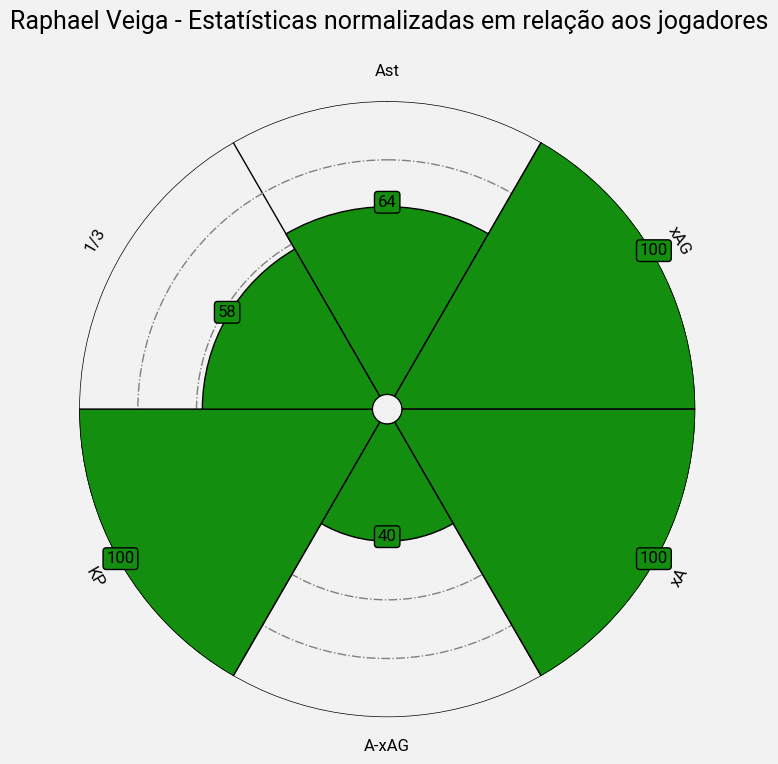

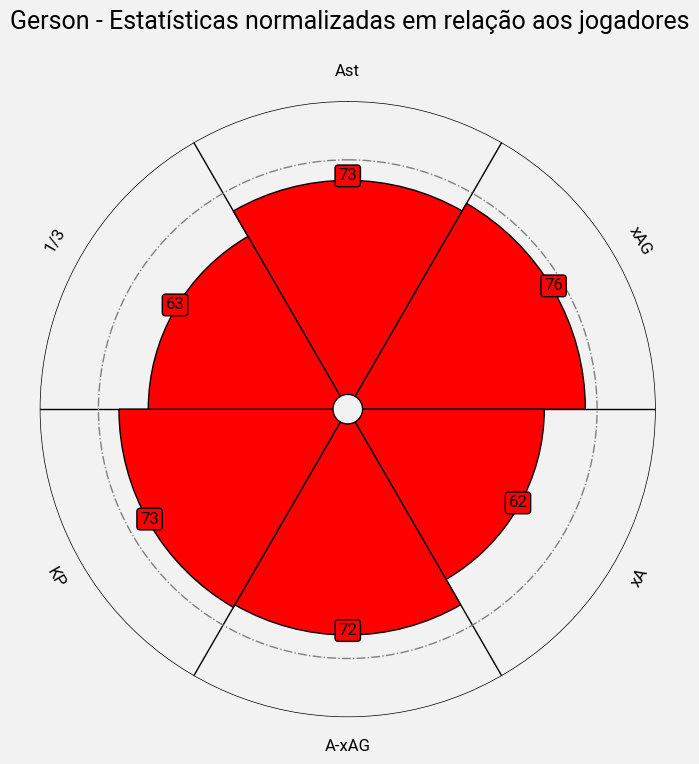

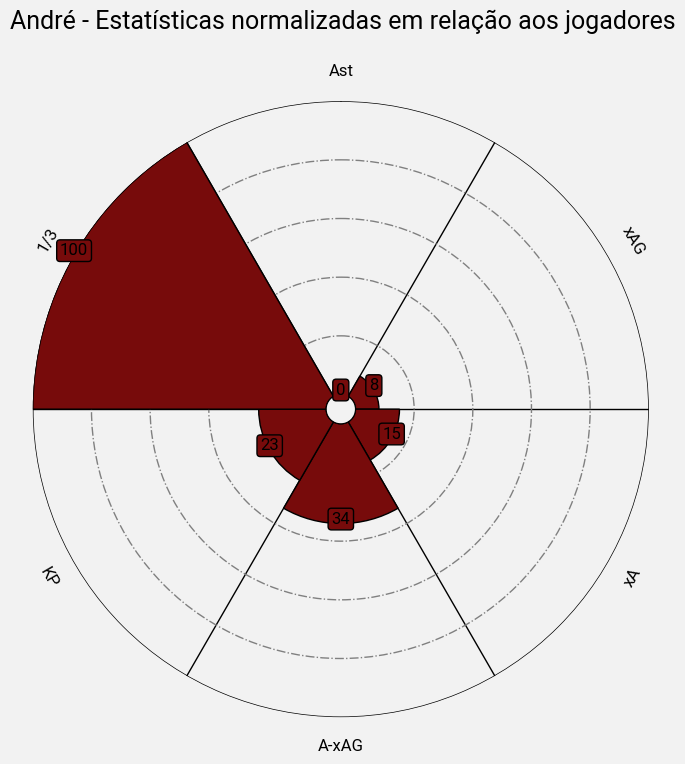

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager

# Carregar os dados dos jogadores
df = pd.read_csv('meias_2023.csv', delimiter=';')

# Mapear os nomes dos jogadores para os times
jogadores_times = {
    'Raphael Veiga': 'Palmeiras',
    'Gerson': 'Flamengo',
    'André': 'Fluminense'
}

# Selecionar os atributos de interesse
atributos = ['Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3']

# Calcular os valores mínimos e máximos de cada atributo
min_vals = df[atributos].min()
max_vals = df[atributos].max()

# Função para normalizar os dados de cada jogador com base nos valores mínimos e máximos
def normalizar_dados_jogador(row):
    jogador_vals = row[atributos]
    jogador_percentis_norm = [(valor - min_vals[atributo]) / (max_vals[atributo] - min_vals[atributo]) * 100 for atributo, valor in jogador_vals.items()]
    return pd.Series(jogador_percentis_norm, index=atributos)

# Normalizar os dados para todos os jogadores
df_normalizado = df.apply(normalizar_dados_jogador, axis=1)

# Definir cores para as fatias do gráfico e para os valores no gráfico
cores_fatias = ['#ff9999', '#66b3ff', '#99ff99']
cores_valores = ['#000000', '#000000', '#000000', '#000000', '#000000', '#000000']

# Mapear jogadores para cores específicas
cores_jogadores = {
    'Raphael Veiga': '#148e0e',  
    'Gerson': '#ff0000',  
    'André': '#770b0b'  
}

# Nome dos atributos
names = ['Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3']

# Criar um gráfico de pizza para cada jogador
for jogador, time in jogadores_times.items():
    dados_jogador = df_normalizado[(df['Player'] == jogador) & (df['Squad'] == time)][atributos].values
    if len(dados_jogador) == 0:
        print(f"Não foi possível encontrar os dados normalizados para {jogador}, do time {time}.")
        continue
    
    # Arredondar os valores normalizados para números inteiros
    dados_jogador_rounded = np.round(dados_jogador[0]).astype(int)
    
    # Obter a cor correspondente ao jogador
    cor_fatia = cores_jogadores[jogador]
    cor_valor = '#000000'  # Cor dos valores definida como preto
    
    # Criar o gráfico de pizza
    baker = PyPizza(
        params=names,
        straight_line_color="#000000",
        straight_line_lw=1,
        last_circle_lw=1,
        other_circle_lw=1,
        other_circle_ls="-."
    )

    fig, ax = baker.make_pizza(
        dados_jogador_rounded,
        figsize=(8, 8),
        param_location=110,
        slice_colors=[cor_fatia] * len(names),
        value_colors=[cor_valor] * len(names),
        value_bck_colors=[cor_fatia] * len(names),
        kwargs_slices=dict(
            facecolor=cor_fatia, edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=FontManager().prop, va="center"
        ),
        kwargs_values=dict(
            color=cor_valor, fontsize=12,
            fontproperties=FontManager().prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor=cor_fatia,
                boxstyle="round,pad=0.2", lw=1
            )
        )
    )

    # Adicionar título
    fig.text(
        0.515, 0.97, f"{jogador} - Estatísticas normalizadas em relação aos jogadores",
        size=18, ha="center", fontproperties=FontManager().prop, color="#000000"
    )

    plt.show()

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

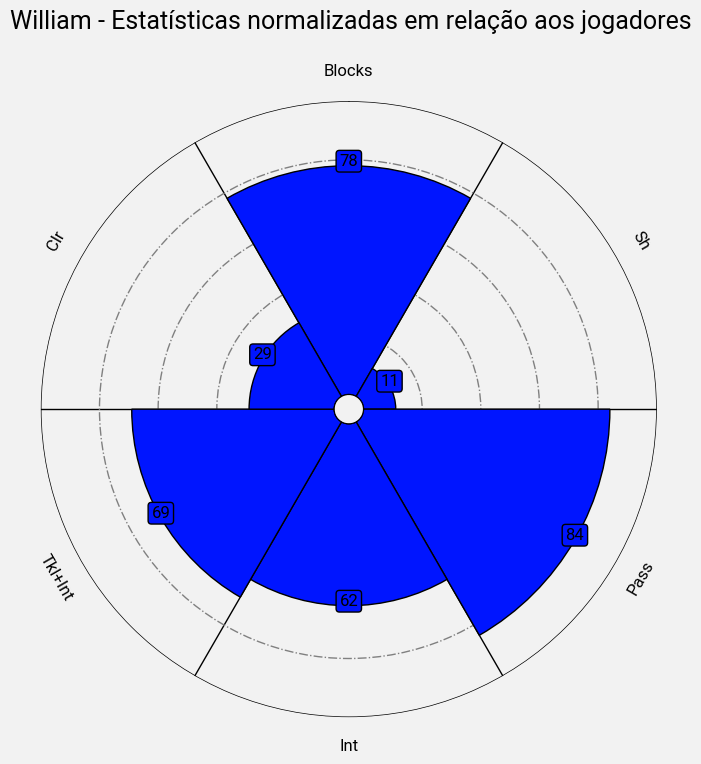

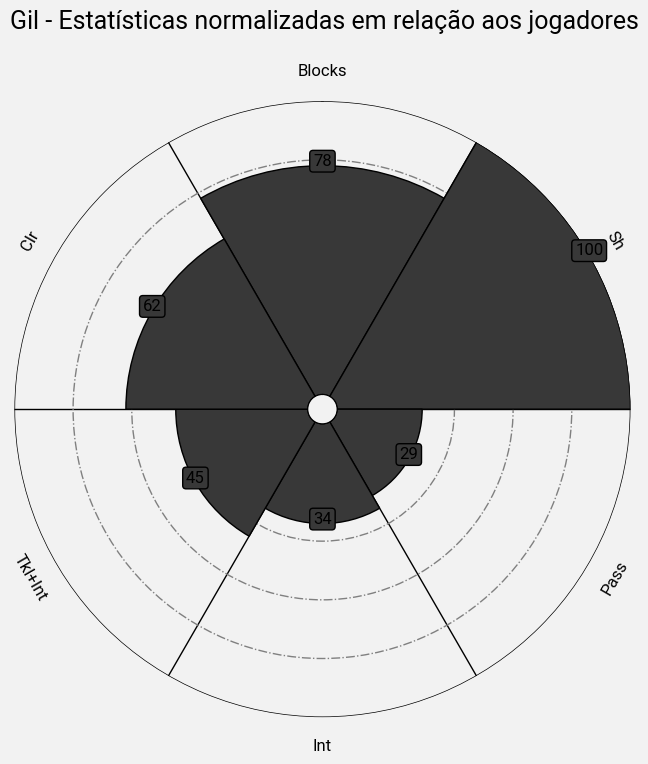

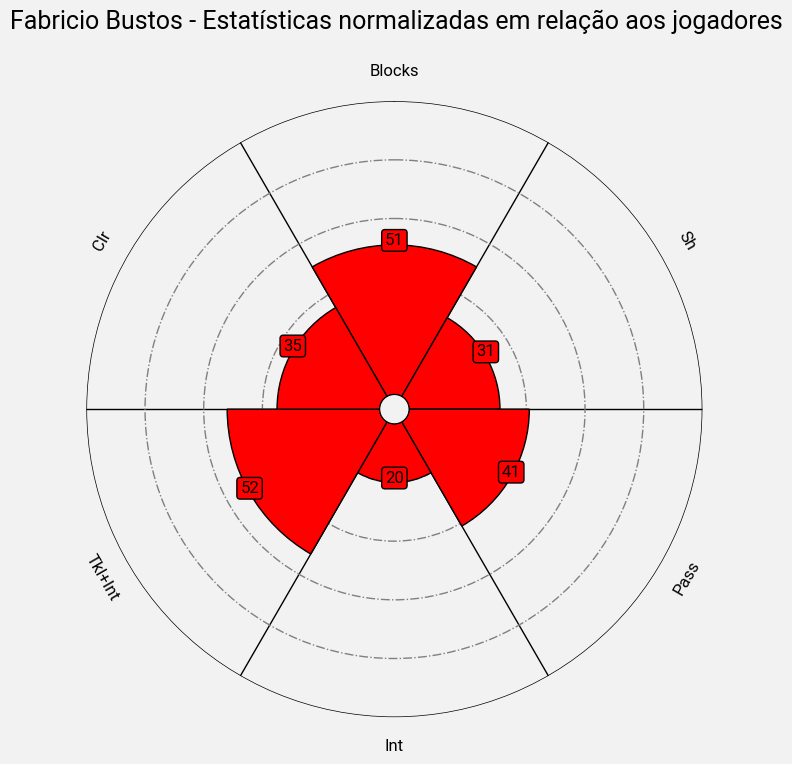

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager

# Carregar os dados dos jogadores
df = pd.read_csv('zagueiros_2023.csv', delimiter=';')

# Mapear os nomes dos jogadores para os times
jogadores_times = {
    'William': 'Cruzeiro',
    'Gil': 'Corinthians',
    'Fabricio Bustos': 'Internacional'
}

# Selecionar os atributos de interesse
atributos = ['Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr']

# Calcular os valores mínimos e máximos de cada atributo
min_vals = df[atributos].min()
max_vals = df[atributos].max()

# Função para normalizar os dados de cada jogador com base nos valores mínimos e máximos
def normalizar_dados_jogador(row):
    jogador_vals = row[atributos]
    jogador_percentis_norm = [(valor - min_vals[atributo]) / (max_vals[atributo] - min_vals[atributo]) * 100 for atributo, valor in jogador_vals.items()]
    return pd.Series(jogador_percentis_norm, index=atributos)

# Normalizar os dados para todos os jogadores
df_normalizado = df.apply(normalizar_dados_jogador, axis=1)

# Definir cores para as fatias do gráfico e para os valores no gráfico
cores_fatias = ['#ff9999', '#66b3ff', '#99ff99']
cores_valores = ['#000000', '#000000', '#000000', '#000000', '#000000', '#000000']

# Mapear jogadores para cores específicas
cores_jogadores = {
    'William': '#0015ff',  
    'Gil': '#383838',  
    'Fabricio Bustos': '#ff0000'  
}

# Nome dos atributos
names = ['Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr']

# Criar um gráfico de pizza para cada jogador
for jogador, time in jogadores_times.items():
    dados_jogador = df_normalizado[(df['Player'] == jogador) & (df['Squad'] == time)][atributos].values
    if len(dados_jogador) == 0:
        print(f"Não foi possível encontrar os dados normalizados para {jogador}, do time {time}.")
        continue
    
    # Arredondar os valores normalizados para números inteiros
    dados_jogador_rounded = np.round(dados_jogador[0]).astype(int)
    
    # Obter a cor correspondente ao jogador
    cor_fatia = cores_jogadores[jogador]
    cor_valor = '#000000'  # Cor dos valores definida como preto
    
    # Criar o gráfico de pizza
    baker = PyPizza(
        params=names,
        straight_line_color="#000000",
        straight_line_lw=1,
        last_circle_lw=1,
        other_circle_lw=1,
        other_circle_ls="-."
    )

    fig, ax = baker.make_pizza(
        dados_jogador_rounded,
        figsize=(8, 8),
        param_location=110,
        slice_colors=[cor_fatia] * len(names),
        value_colors=[cor_valor] * len(names),
        value_bck_colors=[cor_fatia] * len(names),
        kwargs_slices=dict(
            facecolor=cor_fatia, edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=FontManager().prop, va="center"
        ),
        kwargs_values=dict(
            color=cor_valor, fontsize=12,
            fontproperties=FontManager().prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor=cor_fatia,
                boxstyle="round,pad=0.2", lw=1
            )
        )
    )

    # Adicionar título
    fig.text(
        0.515, 0.97, f"{jogador} - Estatísticas normalizadas em relação aos jogadores",
        size=18, ha="center", fontproperties=FontManager().prop, color="#000000"
    )

    plt.show()

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?


Os atributos relevantes para cada posição foram selecionados com base no papel esperado de cada área em influenciar o jogo.  Para os atacantes, por exemplo, priorizamos atributos relacionados à finalização, enquanto para os meio-campistas, buscamos aqueles que influenciam diretamene com  passes e assistências. Já para os zagueiros, os atributos selecionados se concentram em bloqueios e interceptações

Nos radares gerados, para todas as posições, encontramo tantos jogadores que foram dominantes em quase todos os aspectos quanto, jogadores que foram equilibrados, e jogadores que desempenham muito bem em alguns atributos mas que vão muito mal em outros

Dessa maneira, é importanteentenderr que a divisão dos jogadores em apenas três categorias (zagueiros, meio-campos e atacantes) não captura a totalidade das posições existentes no futebol. Sendo assim, devemos reconhecer que é normal haver oscilações entre os jogadores nso atributos analisados. Um exemplo é o André do Fluminense, que, apesar de ser o maior passador no terço final do campo em nossa análise, apresentou resultados abaixo da média em outros atributos, mesmo tendo sido um dos principais jogadores do futebol brasileiro em 2023

Portanto, podemos notar que a análise dos atributos dos jogadores de futebol, segmentadosdessa maneira específicao, oferece uma visão abrangente de suas habilidades e potencial. No entanto, é fundamental considerar as limitações dessa categorização e as nuances individuais de cada atleta para uma avaliação completa e precisa.